# Visualizing Chipotle's Data

### Step 1. Import the necessary libraries

In [39]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [40]:
# have to use the "\t" separator as it is a ".tsv" file
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t")

### Step 3. Assign it to a variable called chipo.

In [41]:
# done in cell above
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [42]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: count, dtype: int64


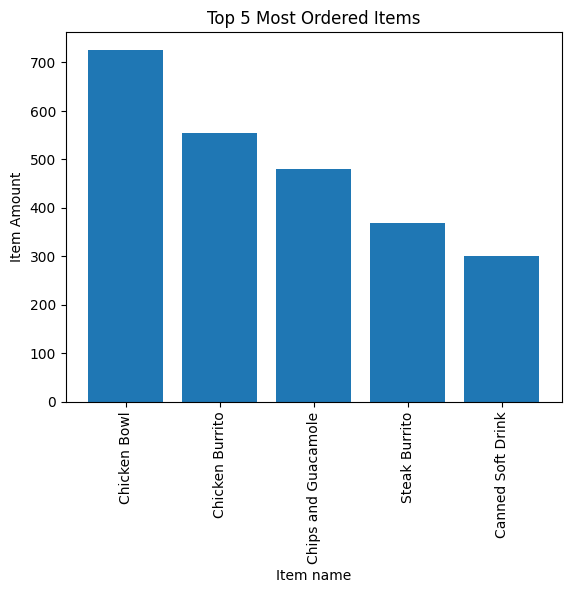

In [43]:
# "value_counts()" by default sorts the values in descending order (then use head to get top 5)
y_item_amount = chipo["item_name"].value_counts().head(5)
print(y_item_amount)
x_items = y_item_amount.index
plt.bar(x_items, y_item_amount)
plt.xlabel("Item name")
plt.ylabel("Item Amount")
plt.title("Top 5 Most Ordered Items")
# So that names are not so squashed
plt.xticks(rotation='vertical')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [75]:
# create a new column with order prices and then get the mean of that
# This is needed for this step and the next step to make my life a bit easier
if "Order Price" not in chipo: # check if in database already so that no error when re-running code
    # apply a lambda function to each value in the "item_price" column to remove the "$"
    chipo["item_price"] = chipo["item_price"].apply((lambda value: value[1:]))

    # create a second lambda function to be used to convert the datatype of "item_price"
    convert_dtype = (lambda colname: chipo[colname][1:].astype(float))
    chipo["item_price"] = convert_dtype("item_price")
    # check if it has changed
    print(chipo["item_price"].dtype)
    # now add "Order Price" column
    chipo.insert(5, "Order Price", (chipo["item_price"] * chipo["quantity"]))

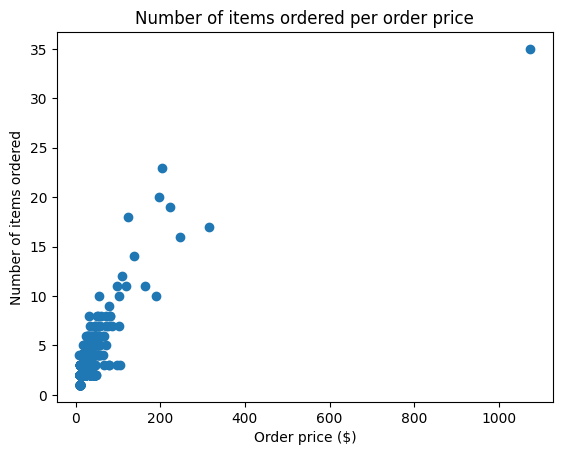

In [106]:
# get the number of items ordered for each order
y_num_items_ord = chipo.groupby("order_id")["quantity"].sum()
# print(y_num_items_ord) # test if we're getting the correct values

# get the total order price for each order
x_order_price = chipo.groupby("order_id")["Order Price"].sum()
# print(x_order_price) # test if getting the correct values

plt.scatter(x_order_price, y_num_items_ord)
plt.xlabel("Order price ($)")
plt.ylabel("Number of items ordered")
plt.title("Number of items ordered per order price")
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

#### Create a histogram plot of the top 5 most expensive orders 
##### Hint: number of items ordered = x-axis and Order Price = y-axis

In [79]:
# Check if it was added successfully
# print(chipo["Order Price"])
# check again in entire dataframe if "Order Price" was added
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description  item_price  Order Price  
0                                                NaN         NaN          NaN  
1                                       [Clementine]        3.39         3.39  
2                                            [Apple]   

      order_id  Order Price  quantity
0            1         9.17         4
1            2        33.96         2
2            3        12.67         2
3            4        21.00         2
4            5        13.70         2
...        ...          ...       ...
1829      1830        23.00         2
1830      1831        12.90         3
1831      1832        13.20         2
1832      1833        23.50         2
1833      1834        28.75         3

[1834 rows x 3 columns]
Most expensive order's Price
1074.24
Top five most expensive orders
      order_id  Order Price  quantity
1442      1443      1074.24        35
510        511       315.29        17
1558      1559       246.00        16
1659      1660       222.75        19
925        926       205.25        23


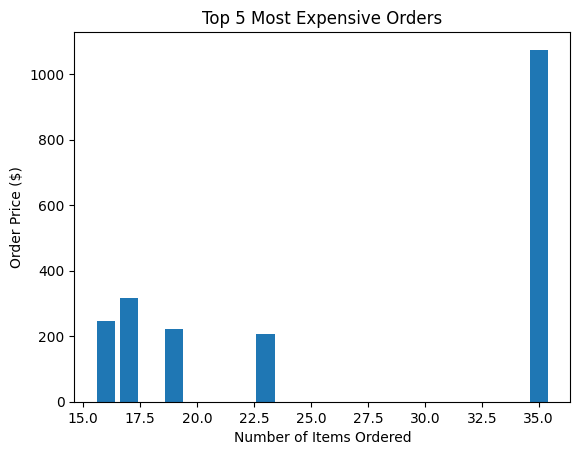

In [113]:
# creating the histogram plot
# get the total order price for each order
y_order_price = chipo.groupby(["order_id"], as_index=False).aggregate({"Order Price": "sum", "quantity": "sum"})
print(y_order_price) # test if getting the correct values
print("Most expensive order's price")
print(y_order_price["Order Price"].max())

# now get top five order prices
y_top_five_order_prices = y_order_price.sort_values(by="Order Price", ascending=False).head(5)
print("Top five most expensive orders")
print(y_top_five_order_prices) # test if getting the correct values

# get the number of items ordered for each of the top 5 most expensive orders
x_num_items_ord = y_top_five_order_prices["quantity"]
# x_num_items_ord = chipo.groupby("order_id")["quantity"].sum()
# print(y_num_items_ord) # test if we're getting the correct values
plt.bar(x_num_items_ord, y_top_five_order_prices["Order Price"])
plt.xlabel("Number of Items Ordered")
plt.ylabel("Order Price ($)")
plt.title("Top 5 Most Expensive Orders")
plt.show()